In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data_pakistan.csv",low_memory=False)
pd.set_option('display.max_columns', None)
df.head()


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,07/01/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,0.0,cod,07/01/2016,#REF!,"1,950",2016,7,2016-7,יול-16,FY17,1.0
1,211133,canceled,07/01/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,0.0,cod,07/01/2016,Gross,240,2016,7,2016-7,יול-16,FY17,2.0
2,211134,canceled,07/01/2016,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,0.0,cod,07/01/2016,Gross,"2,450",2016,7,2016-7,יול-16,FY17,3.0
3,211135,complete,07/01/2016,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,07/01/2016,Net,360,2016,7,2016-7,יול-16,FY17,4.0
4,211136,order_refunded,07/01/2016,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,0.0,cod,07/01/2016,Valid,"1,110",2016,7,2016-7,יול-16,FY17,5.0


In [ ]:
df.shape


(584524, 21)

# Initial Exploration & Data Cleaning
I will start exploring the data and understand what is needed to be cleaned.
My approach will be to narrow the initial exploration to categorical and numerical columns sepertly, since they (sometimes) require different approach and cleaning techiques.

Let's look at the data:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

let's make more easy-read names + trim whitespaces:


In [ ]:
import re
def clean_column_name(name):
    name = name.strip()                      #remove whitespace
    name = re.sub(r'\s+', '_', name)         #replace spaces with underscores
    return name.lower()

df.columns = [clean_column_name(col) for col in df.columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  working_date           584524 non-null  object 
 13  bi_status              584524 non-null  object 
 14  mv                     584524 non-nu

In [ ]:
df.head(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,working_date,bi_status,mv,year,month,customer_since,m-y,fy,customer_id
0,211131,complete,07/01/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,0.0,cod,07/01/2016,#REF!,"1,950",2016,7,2016-7,יול-16,FY17,1.0
1,211133,canceled,07/01/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,0.0,cod,07/01/2016,Gross,240,2016,7,2016-7,יול-16,FY17,2.0


## Categorical Columns: Exploration

Let's start to look at the categorical columns (the suspected categorical columns):

In [ ]:
df_categorical = df[['status','sku','increment_id','category_name_1','sales_commission_code','payment_method','bi_status','m-y','fy']]

Let's get a quice look at them:

In [ ]:
for col in df_categorical.columns:
    print(f"\033[1mColumn:\033[0m '{col}'")
    unique_vals = df_categorical[col].nunique(dropna=False)
    nan_count = df_categorical[col].isna().sum()

    print(f"Unique values (including NaN): {unique_vals}")
    print(f"Missing values: {nan_count}")
    print("\nTop values:")
    print(df_categorical[col].value_counts(dropna=False).head(20))

    print("-" * 60 + "\n")

Column: 'status'
Unique values (including NaN): 17
Missing values: 15

Top values:
status
complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
NaN                   15
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: count, dtype: int64
------------------------------------------------------------

Column: 'sku'
Unique values (including NaN): 84890
Missing values: 20

Top values:
sku
MATSAM59DB75ADB2F80              3775
Al Muhafiz Sohan Halwa Almond    2258
emart_00-7                       2027
kcc_krone deal                   1894
infinix_Zero 4-Grey              1793
emart_00-1                       1391
MATSAM59DB757FB47A2              1273
Rubian_U8 Smart Watch            1233
unilev

In [ ]:
df_categorical.isnull().mean()

,0
status,0.000026
sku,0.000034
increment_id,0.000000
category_name_1,0.000281
sales_commission_code,0.234683
payment_method,0.000000
bi_status,0.000000
m-y,0.000000
fy,0.000000


Let's take some notes regarding the above results about the categorical columns (note: I will talk seperatly about the bi_status column in the next dedicated section)

**Status column:**
1. May have some values which should be treated the same
(refund, order_refunded, exchange) - We should validate before doing something.
2."\N" should be treated as null\NaN (since there are only 4)

**Category_name_1 column:**
1. 7850 Values "\N" ; we should keep that in mind and consider if to drop them or to try do some aggregation which will help to understand how to fill them properly. This may not be neccesary due to the high amount of records in the dataset; BUT, if we somehow find that these all belong (for example) for a specific SKU or something, maybe we will understand better how to treat them. So for now let's keep in mind the following: We want to check what are the correspondings "SKU" values for the "\N" values in category_name_1 column.

**increment_id column:**
Probably "OrderID". Could be used to make some interesting aggregations to find customer patterns\bevahoir in orders.

**sales_commission_code column:**

1. "\N" should be replaced with NaN; unlike my previous suggestion (regarding **not** droping '\N' very fast in the category_name_1 column) here there are just too unique values in the column and there is no possible aggregation I can think of.
2. A lot of NaN
3. There are duplicates which are considered distinct values due to upper-case: c-lhc-30667 and C-LHC-30667 for example.
4. Generally, we see that the intended foramt of the values (the standard format) is of the form X-XXX-YYYYY, where X are "place holders" for Capital letters (1 and three) and Y are place-holders for digits not necceseraly 5 digits)

**payment_method:**

maybe we should group some of the similiar options. Or at least note and keep in mind a possible similar\close values:

1. Easypay & easypay_voucher & Easypay_MA ("easypay")
2. easypay_voucher & jazzvoucher (vouchers)

**m-y column:**
month-year. We also have two distinct columns for year and month;
I will probably drop them. also, of course, changing the data type to date.

**bi_status:** I will talk about this column in a dedicated (next) section.

For now, let's take the above notes and do some data cleaning according to (some of) them.









## **Categorical Columns: Cleaning & Validation**

### **Drop rows from 'Status' Column**

In [ ]:

## Let's check if "refund" and "order_refunded" can occur within same order:

count = (
    df[df['status'].isin(['refund', 'order_refunded'])]
    .groupby('increment_id')['status']
    .apply(lambda x: {'refund', 'order_refunded'}.issubset(set(x)))
    .sum()
)

print("Orders with both statuses:", count)

## I think I will not merge them. I will treat them as designating different phase despite the similiary in their names.

Orders with both statuses: 0


In [ ]:
## Let's drop the entire 4 rows which consists "\N" in status column:
df = df[df['status'] != r'\N']


### **Category_name_1 Column: Cleaning & Filling**

In [ ]:
# Filter rows where category_name_1 is '\N'
category_unknown = df[df['category_name_1'] == '\\N']

# let's look at the sku's with at least one occornace of "N" in their category name:
sku_counts = category_unknown['sku'].value_counts()

print(sku_counts)

sku
emart_00-1                               1343
Telemall_MM-DR-HB-L                       878
test-product-00                           774
test-product                              611
Infinix Hot 4 Nationwide-Gold             479
                                         ... 
BO_Silicone Pastry & BBQ Brush - Blue       1
Charizma_DG33                               1
Charizma_DG38                               1
Dany6-954217-456980                         1
D Lend a Helping Hand                       1
Name: count, Length: 295, dtype: int64


**We see there are 295 SKU's for which there is AT LEAST one occornace of "\N" for the category_name.**

In [ ]:
category_unknown

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,working_date,bi_status,mv,year,month,customer_since,m-y,fy,customer_id
24,211157,order_refunded,07/01/2016,D Lend a Helping Hand,1000.0,1,0.0,100147461,\N,\N,0.0,customercredit,07/01/2016,Valid,"1,000",2016,7,2016-7,יול-16,FY17,16.0
72,211214,canceled,07/01/2016,sentiments_WRK1612,1.0,1,1.0,100147496,\N,C-RWP-102627,0.0,cod,07/01/2016,Gross,1,2016,7,2016-7,יול-16,FY17,33.0
79,211222,canceled,07/01/2016,sentiments_WRK1612,1.0,5,5.0,100147502,\N,C-RWP-66032,0.0,cod,07/01/2016,Gross,5,2016,7,2016-7,יול-16,FY17,33.0
80,211223,canceled,07/01/2016,sentiments_WRK1612,1.0,2,2.0,100147503,\N,C-RWP-31924,0.0,cod,07/01/2016,Gross,2,2016,7,2016-7,יול-16,FY17,33.0
81,211225,canceled,07/01/2016,sentiments_WRK1612,1.0,1,1.0,100147505,\N,C-RWP-102627,0.0,cod,07/01/2016,Gross,1,2016,7,2016-7,יול-16,FY17,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423207,722206,order_refunded,12/27/2017,OTHOTH5A0945D0A72F4,90.0,2,330.0,100440581,\N,\N,0.0,cod,12/27/2017,Valid,180,2017,12,2017-11,דצמ-17,FY18,66884.0
423231,722242,cod,12/27/2017,MEFQMO59B0942707B79-L,99.0,1,249.0,100440593,\N,\N,0.0,cod,12/27/2017,Valid,99,2017,12,2017-11,דצמ-17,FY18,66884.0
423826,722915,order_refunded,12/29/2017,OTHOTH5A0945D0A72F4,90.0,2,330.0,100440967,\N,\N,0.0,cod,12/29/2017,Valid,180,2017,12,2017-8,דצמ-17,FY18,59587.0
423829,722918,order_refunded,12/29/2017,MEFQMO59B0942707B79-S,99.0,2,348.0,100440970,\N,\N,0.0,cod,12/29/2017,Valid,198,2017,12,2017-11,דצמ-17,FY18,66884.0


In [ ]:
len(category_unknown) ## (remmeber we remove 4 rows with "\N")

7846

In [ ]:
# get the SKUs with category_name = "\N":
skus_with_missing_category = category_unknown['sku'].unique()

# check what categories those sku's have elsewhere:
sku_category_lookup = df[
    (df['sku'].isin(skus_with_missing_category)) &
    (df['category_name_1'] != '\\N') &
    (df['category_name_1'].notna())
].groupby('sku')['category_name_1'].value_counts(normalize=True)

print(sku_category_lookup)

sku                                    category_name_1  
Dawlance_MD 10 + DWB 600               Appliances           1.0
Huawei_P9Lite-Black                    Mobiles & Tablets    1.0
Huawei_P9Lite-Gold                     Mobiles & Tablets    1.0
JSM_JSM-001-White-Pak-Shirt-L          Men's Fashion        1.0
JSM_JSM-001-White-Pak-Shirt-M          Men's Fashion        1.0
JSM_JSM-002-Green-Pak-Shirt -L         Men's Fashion        1.0
JSM_JSM-002-Green-Pak-Shirt -M         Men's Fashion        1.0
JSM_JSM-002-Green-Pak-Shirt -S         Men's Fashion        1.0
JSM_JSM-003-ComboGreenWhitePakShirt-L  Men's Fashion        1.0
JSM_JSM-003-ComboGreenWhitePakShirt-M  Men's Fashion        1.0
JSM_JSM-003-ComboGreenWhitePakShirt-S  Men's Fashion        1.0
OTHOTH5A0945D0A72F4                    Others               1.0
RB_Dettol Germ Busting Kit-bf          Superstore           1.0
Regal_052-N-B-BROWN-7                  Women's Fashion      1.0
airlink_huawei_Google-Nexus-6P-Silver  Mobiles 

from the above result, we can see that out of 295 distinct SKUs that have "\N" as their category_name, only 20 distint SKUs appear elsewhere in the dataset with a single consistent OTHER category (not "\N"). We can reasonably assume that this category reflects their true classification.

In [ ]:
## Let's make from the above result a DataFrame with three columns: sku, Category_name_1, proportion:

sku_to_category_df = sku_category_lookup.reset_index(name='proportion')


In [ ]:
sku_to_category_df

,sku,category_name_1,proportion
0,Dawlance_MD 10 + DWB 600,Appliances,1.0
1,Huawei_P9Lite-Black,Mobiles & Tablets,1.0
2,Huawei_P9Lite-Gold,Mobiles & Tablets,1.0
3,JSM_JSM-001-White-Pak-Shirt-L,Men's Fashion,1.0
4,JSM_JSM-001-White-Pak-Shirt-M,Men's Fashion,1.0
5,JSM_JSM-002-Green-Pak-Shirt -L,Men's Fashion,1.0
6,JSM_JSM-002-Green-Pak-Shirt -M,Men's Fashion,1.0
7,JSM_JSM-002-Green-Pak-Shirt -S,Men's Fashion,1.0
8,JSM_JSM-003-ComboGreenWhitePakShirt-L,Men's Fashion,1.0
9,JSM_JSM-003-ComboGreenWhitePakShirt-M,Men's Fashion,1.0


Let's paraphrase our finding:  
Some rows have "\N" in the category_name_1 column, but their corresponding SKUs appear elsewhere in the data with a clear and consistent (100%) category match. Therefore, we can safely replace the "\N" values with the correct category — but only for these 20 SKUs where the mapping is certain.

I will create a dictionary in order to use it to map each SKU to category name:


In [ ]:
sku_to_category_mapping = dict(zip(sku_to_category_df['sku'],sku_to_category_df['category_name_1']))

In [ ]:
sku_to_category_mapping

{'Dawlance_MD 10 + DWB 600': 'Appliances',
 'Huawei_P9Lite-Black': 'Mobiles & Tablets',
 'Huawei_P9Lite-Gold': 'Mobiles & Tablets',
 'JSM_JSM-001-White-Pak-Shirt-L': "Men's Fashion",
 'JSM_JSM-001-White-Pak-Shirt-M': "Men's Fashion",
 'JSM_JSM-002-Green-Pak-Shirt -L': "Men's Fashion",
 'JSM_JSM-002-Green-Pak-Shirt -M': "Men's Fashion",
 'JSM_JSM-002-Green-Pak-Shirt -S': "Men's Fashion",
 'JSM_JSM-003-ComboGreenWhitePakShirt-L': "Men's Fashion",
 'JSM_JSM-003-ComboGreenWhitePakShirt-M': "Men's Fashion",
 'JSM_JSM-003-ComboGreenWhitePakShirt-S': "Men's Fashion",
 'OTHOTH5A0945D0A72F4': 'Others',
 'RB_Dettol Germ Busting Kit-bf': 'Superstore',
 'Regal_052-N-B-BROWN-7': "Women's Fashion",
 'airlink_huawei_Google-Nexus-6P-Silver': 'Mobiles & Tablets',
 'aw_PKS-0013-White-S': "Men's Fashion",
 'clickbuscollection_nwc-29-Purple': "Women's Fashion",
 'clickbuscollection_nwc-29-Red': "Women's Fashion",
 'emart_00-1': 'Others',
 'mt_Red-Battery-Case-for-iPhone-5-&-5s': 'Mobiles & Tablets'}

In [ ]:
# Step 1: Create a mask for rows where category_name_1 is '\N'
mask = df['category_name_1'] == '\\N'

# Step 2: Map known categories using the SKU mapping dictionary
mapped_categories = df.loc[mask, 'sku'].map(sku_to_category_mapping)

# Step 3: Count how many values will be updated (i.e., not null)
num_updated = mapped_categories.notna().sum()

# Step 4: Fill only known mappings back into the DataFrame, leave the rest as '\N'
df.loc[mask, 'category_name_1'] = mapped_categories.fillna('\\N')

# Step 5: Report
print(f"{num_updated} '\\N' values were updated with known categories.")

2134 '\N' values were updated with known categories.




### **Drop Sale_commision_Code Column**
This column was dropped due to:

High missing rate: Over 90% of values are either NaN or \N.

High cardinality: More than 7,200 unique values, most of them rare.

No reliable imputation method: Unlike other columns, this one lacks patterns to infer missing values.

It adds noise without contributing useful information.

In [ ]:
df = df.drop(columns=['sales_commission_code'])


In [ ]:
df.shape

(584520, 20)

### **Data Types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584520 entries, 0 to 584523
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584520 non-null  int64  
 1   status           584505 non-null  object 
 2   created_at       584520 non-null  object 
 3   sku              584500 non-null  object 
 4   price            584520 non-null  float64
 5   qty_ordered      584520 non-null  int64  
 6   grand_total      584520 non-null  float64
 7   increment_id     584520 non-null  object 
 8   category_name_1  584356 non-null  object 
 9   discount_amount  584520 non-null  float64
 10  payment_method   584520 non-null  object 
 11  working_date     584520 non-null  object 
 12  bi_status        584520 non-null  object 
 13  mv               584520 non-null  object 
 14  year             584520 non-null  int64  
 15  month            584520 non-null  int64  
 16  customer_since   584509 non-null  object 
 

In [ ]:
df['mv']

,mv
0,"1,950"
1,240
2,"2,450"
3,360
4,"1,110"
...,...
584519,699
584520,"35,599"
584521,"259,998"
584522,"174,600"


In [ ]:
df['working_date'] = pd.to_datetime(df['working_date'], errors='coerce')
df['customer_since'] = pd.to_datetime(df['customer_since'], errors='coerce')

df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
df['mv'] = pd.to_numeric(df['mv'], errors='coerce')


In [ ]:
df = df.sort_values('created_at')  # or 'working_date' if more accurate
df['price_cumsum'] = df['price'].cumsum()
df[['price_cumsum', 'mv']].head(20)  # compare visually

,price_cumsum,mv
133909,825.0,825.0
134114,1425.0,600.0
134113,2299.0,874.0
134112,3072.0,773.0
134111,3372.0,300.0
134110,3502.0,130.0
134109,3801.0,299.0
134115,4679.0,878.0
134108,4804.0,125.0
134106,28803.0,NaN


In [ ]:
sku_mv_summary = df.groupby('sku')['mv'].nunique().sort_values(ascending=False)
print(sku_mv_summary.head(295))

sku
OTHOTH5A0945D0A72F4    35
KNO59D64DAC18B6C       23
test-product-00        21
test-product           20
OTHOTH59E4496197EAF    19
                       ..
kcc_lush                6
kcc_effect              6
SMSM_270511             6
SMSM_2703072            6
SMSM_2703075            6
Name: mv, Length: 295, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584520 entries, 0 to 584523
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584520 non-null  int64         
 1   status           584505 non-null  object        
 2   created_at       584520 non-null  object        
 3   sku              584500 non-null  object        
 4   price            584520 non-null  float64       
 5   qty_ordered      584520 non-null  int64         
 6   grand_total      584520 non-null  float64       
 7   increment_id     584520 non-null  object        
 8   category_name_1  584356 non-null  object        
 9   discount_amount  584520 non-null  float64       
 10  payment_method   584520 non-null  object        
 11  working_date     584520 non-null  datetime64[ns]
 12  bi_status        584520 non-null  object        
 13  mv               292932 non-null  float64       
 14  year             584520 n

**That wraps up this section. Here's a quick summary of what we covered:**

1.Performed an initial exploration of the categorical columns

2.Handled missing values by either dropping or filling them when appropriate

3.Converted columns to the correct data types

4.Checked the data for consistency and integrity

## **Numerical Columns: Cleaning & Validation**

In [ ]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,year,month,customer_id
count,584520.000000,5.845200e+05,584520.000000,5.845200e+05,584520.000000,584520.000000,584520.000000,584509.000000
mean,565667.340953,6.348791e+03,1.296387,8.530675e+03,499.496193,2017.044115,7.167656,45790.815587
std,200121.832408,1.494931e+04,3.996074,6.132102e+04,1506.947636,0.707357,3.486317,34414.884431
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,394999.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568426.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739107.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


Some initial notes to consider:

1. price with value = 0 should be checked. Maybe to see if it is part of a gift or bundle to the customer, or (more probable) a missing value.
 So consider how to check it. Also, of course, consider how to fill it with appropriate value (for example: taking the mean\median price of the product from the whole df


In [ ]:
df.to_csv('cleaned_df.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Data Types Conversion

In [ ]:
numeric_cols = ['price', 'qty_ordered', 'grand_total', 'discount_amount']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

## Numerical Columns: Exploration

In [ ]:
df.corr(numeric_only=True)

,item_id,price,qty_ordered,grand_total,discount_amount,year,month,customer_id
item_id,1.000000,0.141596,0.033381,0.049265,0.136514,0.920564,-0.292861,0.780033
price,0.141596,1.000000,-0.017629,0.277607,0.455577,0.129051,-0.034473,0.156805
qty_ordered,0.033381,-0.017629,1.000000,0.753487,-0.007621,0.039236,-0.033652,0.025672
grand_total,0.049265,0.277607,0.753487,1.000000,0.104825,0.048432,-0.020887,0.054042
discount_amount,0.136514,0.455577,-0.007621,0.104825,1.000000,0.116063,-0.013387,0.134845
year,0.920564,0.129051,0.039236,0.048432,0.116063,1.000000,-0.634711,0.717479
month,-0.292861,-0.034473,-0.033652,-0.020887,-0.013387,-0.634711,1.000000,-0.231810
customer_id,0.780033,0.156805,0.025672,0.054042,0.134845,0.717479,-0.231810,1.000000


<Axes: >

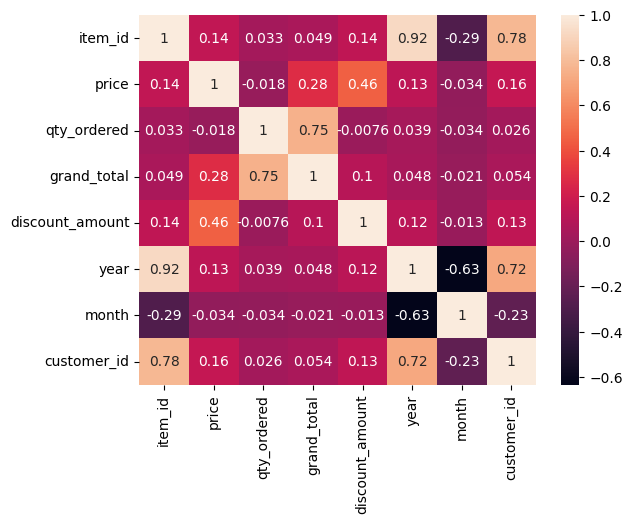

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

initial things to consider looking forward:
1. qty_ordered & grand_total (not suprising, of course)
2. discount_amount & price

# Encoding Categorical Variables

Let's encode the caegorical variables in order to perform some initial analysis.

In [ ]:
df_categorical.columns

Index(['status', 'sku', 'increment_id', 'category_name_1',
       'sales_commission_code', 'payment_method', 'bi_status', 'm-y', 'fy'],
      dtype='object')

It seems reasonable to  encode the folllowing variables, at most:
1. Status
2. BI_status
3. Payment Method
4. FY
5. Category_name_1

In [ ]:
to_encode = df_categorical[['status','bi_status','payment_method','fy','category_name_1']]

In [ ]:
for col in to_encode:
  print(f"column name : {col},  and the values of it are : ")
  print(to_encode[col].values)

column name : status,  and the values of it are : 
['complete' 'canceled' 'canceled' ... 'processing' 'processing'
 'processing']
column name : bi_status,  and the values of it are : 
['#REF!' 'Gross' 'Gross' ... 'Gross' 'Gross' 'Gross']
column name : payment_method,  and the values of it are : 
['cod' 'cod' 'cod' ... 'bankalfalah' 'bankalfalah' 'bankalfalah']
column name : fy,  and the values of it are : 
['FY17' 'FY17' 'FY17' ... 'FY19' 'FY19' 'FY19']
column name : category_name_1,  and the values of it are : 
["Women's Fashion" 'Beauty & Grooming' "Women's Fashion" ...
 'Mobiles & Tablets' 'Mobiles & Tablets' 'Mobiles & Tablets']


In [ ]:
encoder =
{}

<ipython-input-50-8a80d5656a4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['FY'] = df_copy['FY'].str.replace('FY', '').astype(int)


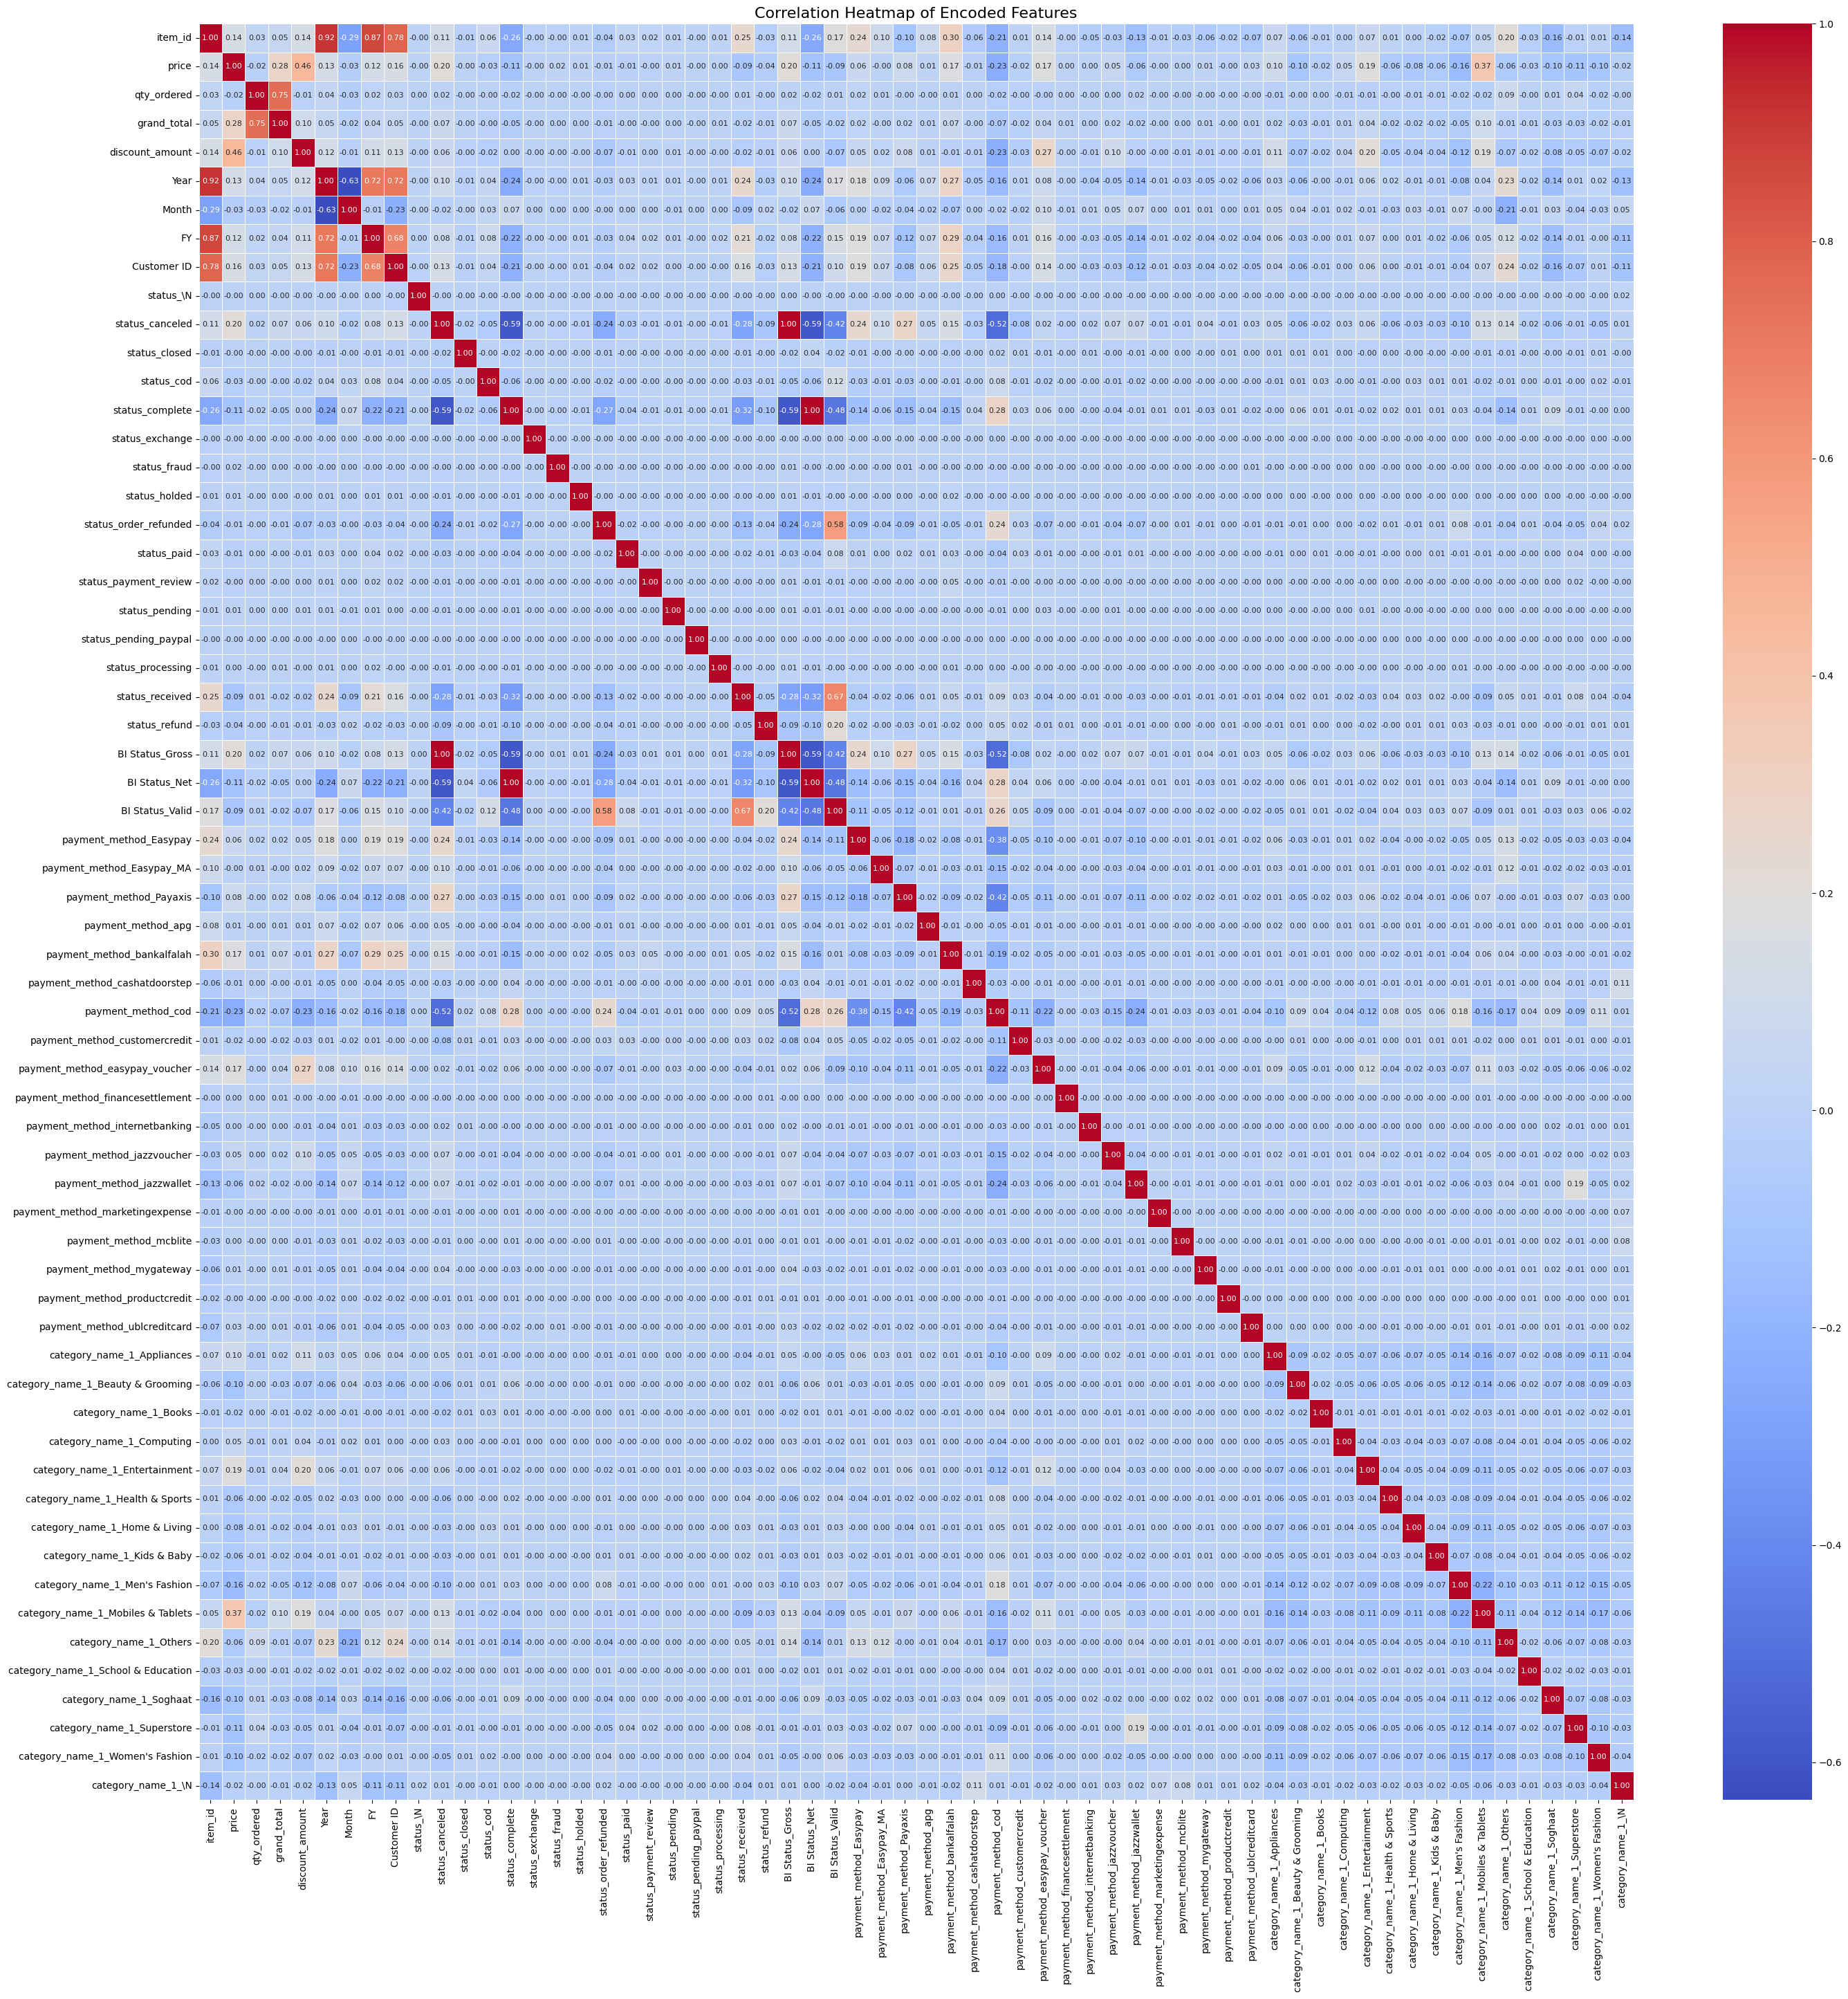

In [ ]:

df_copy = df

# 1. Clean bi_status
df_copy = df[df['BI Status'] != '#REF!']

# 2. Convert 'fy' to integer
df_copy['FY'] = df_copy['FY'].str.replace('FY', '').astype(int)

# 3. Define categorical columns to encode
categorical_cols = ['status', 'BI Status', 'payment_method', 'category_name_1']

# 4. One-hot encode selected categorical columns
df_encoded = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=False)

# 5. Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True)

# 6. Plot heatmap
plt.figure(figsize=(29, 29))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5,annot_kws={'size': 8})
plt.title("Correlation Heatmap of Encoded Features", fontsize=16)
plt.tight_layout()
plt.show()

The above categorical heatmap suggest us to take a closer look at try to see if we can interpert "bi status" column. **Maybe I was right with my intuition not to drop it so fast.** Let's see if we can understand this column or give it a possible meaningful interpertation:

In [ ]:
df.groupby('bi_status')['status'].value_counts()

bi_status  status        
#REF!      complete               1
Gross      canceled          201249
           payment_review        57
           pending               48
           processing            33
           holded                31
           fraud                 10
           pending_paypal         7
           \N                     4
Net        complete          233684
           closed               494
Valid      received           77290
           order_refunded     59529
           refund              8050
           cod                 2859
           paid                1159
           exchange               4
Name: count, dtype: int64

The relation between BI_status and status is somehow analogous to category and sub category. A better sense to understand it, is treating the BI status as a column in the "final" data warehouse or final API, in which transactions are catagorized in less details and more toward a specific business logic.